<a href="https://colab.research.google.com/github/armand010/PembMesin_Ganjil_2024/blob/main/Week9_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

  - Metode pra pengolahan

  - Pemilihan fitur

  - Arsitektur ANN

  - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

- **DIKERJAKAN SECARA BERKELOMPOK**

- **JELASKAN HASIL YANG ANDA DAPATKAN,**

  - **AKURASI**

  - **CONFUSION MATRIX**

  - **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

## Import Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Pra-pengolahan Data

In [2]:
# Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi pixel ke rentang [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding pada label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## ANN

In [3]:
# Inisiasi model ANN
model = Sequential()

# Flatten layer untuk meratakan input 28x28 menjadi vektor 784
model.add(Flatten(input_shape=(28, 28)))

# Hidden layer pertama dengan 128 neuron dan ReLU
model.add(Dense(units=128, activation='relu'))

# Hidden layer kedua dengan 64 neuron dan ReLU
model.add(Dense(units=64, activation='relu'))

# Output layer dengan 10 neuron (untuk 10 digit) dan softmax activation
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Kompilasi dan Pelatihan Model

In [4]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model dengan data latih
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8635 - loss: 0.4683 - val_accuracy: 0.9578 - val_loss: 0.1388
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9659 - loss: 0.1118 - val_accuracy: 0.9677 - val_loss: 0.1100
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9784 - loss: 0.0671 - val_accuracy: 0.9718 - val_loss: 0.0948
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9826 - loss: 0.0551 - val_accuracy: 0.9737 - val_loss: 0.0944
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0400 - val_accuracy: 0.9712 - val_loss: 0.0992
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9892 - loss: 0.0314 - val_accuracy: 0.9722 - val_loss: 0.1017
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9746 - val_loss: 0.1040
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9935 - loss: 0.02

## Evaluasi Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9759 - loss: 0.1082
Akurasi pada data uji: 97.81%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


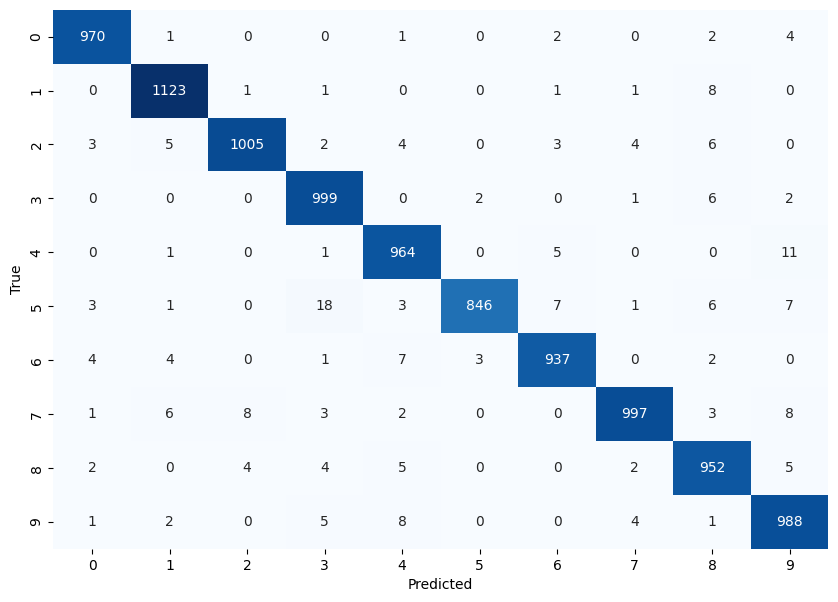

In [5]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi pada data uji: {test_accuracy * 100:.2f}%')

# Prediksi hasil pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()